In [1]:
!pip install pandas

Looking in indexes: http://mirrors.aliyun.com/pypi/simple


In [21]:
import pandas as pd
df = pd.read_csv('merged_years1.csv')
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [22]:
df.head()

,CMTE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_TP,TRANSACTION_DT,TRANSACTION_AMT
0,C00401224,"EDWARDS, DONALD",SANTA ROSA,CA,95409.0,NOT EMPLOYED,NOT EMPLOYED,24T,1012021,250
1,C00401224,"ELAM NORRIS, GLORIA",CHICAGO,IL,60649.0,UNIV OF IL,PHYSICIAN,24T,1012021,250
2,C00401224,"ELAM NORRIS, GLORIA",CHICAGO,IL,60649.0,UNIV OF IL,PHYSICIAN,24T,1012021,250
3,C00401224,"EHRENKRANZ, ANDRA",NEW YORK,NY,10021.0,NOT EMPLOYED,NOT EMPLOYED,24T,1012021,250
4,C00401224,"EASTERBROOK, LESLIE",TARZANA,CA,91356.0,NONE,NOT EMPLOYED,24T,1012021,100


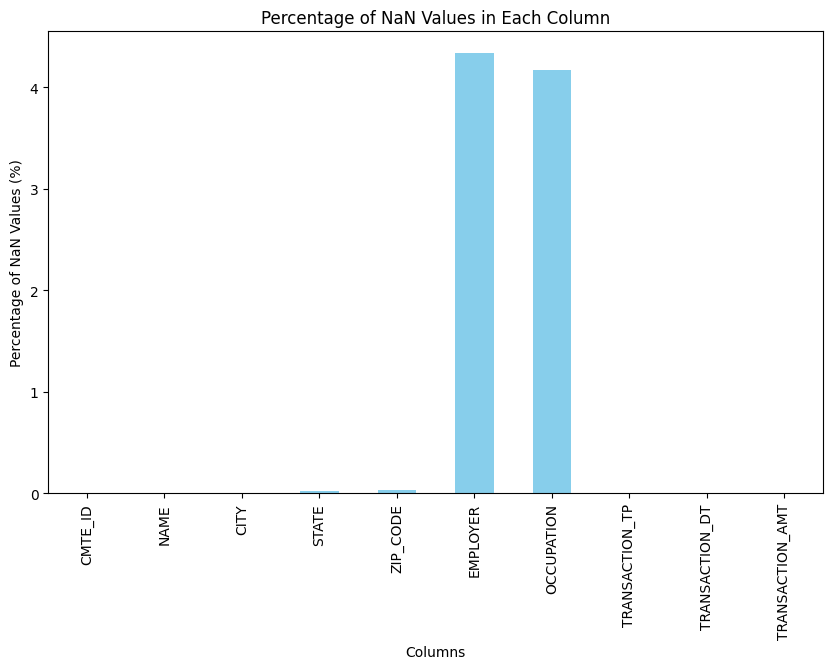

In [4]:
import matplotlib.pyplot as plt

# Calculating the percentage of NaN values in each column
nan_percentage = df.isnull().mean() * 100

# Creating a bar plot
plt.figure(figsize=(10, 6))
nan_percentage.plot.bar(color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values (%)')
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45520252 entries, 0 to 45520251
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   CMTE_ID          object
 1   NAME             object
 2   CITY             object
 3   STATE            object
 4   ZIP_CODE         object
 5   EMPLOYER         object
 6   OCCUPATION       object
 7   TRANSACTION_TP   object
 8   TRANSACTION_DT   object
 9   TRANSACTION_AMT  object
dtypes: object(10)
memory usage: 3.4+ GB


In [23]:
# Assuming 'df' is your DataFrame and 'TRANSACTION_DT' contains the described numbers
# The approach is to first convert all numbers to 8-digit format and then reformat them into MMDDYYYY format

# Convert 'TRANSACTION_DT' to string and remove decimal points
df['TRANSACTION_DT'] = df['TRANSACTION_DT'].astype(str).str.split('.').str[0]

# Pad 7-digit numbers to 8-digit by adding a leading zero
df['TRANSACTION_DT'] = df['TRANSACTION_DT'].apply(lambda x: x.zfill(8))

# Reformat to MMDDYYYY
df['TRANSACTION_DT'] = df['TRANSACTION_DT'].apply(lambda x: x[:2] + x[2:4] + x[4:])

# Display the transformed 'TRANSACTION_DT' column
print(df['TRANSACTION_DT'].head())


0    01012021
1    01012021
2    01012021
3    01012021
4    01012021
Name: TRANSACTION_DT, dtype: object


In [24]:
# Assuming 'df' is your DataFrame and 'TRANSACTION_DT' is correctly formatted as MMDDYYYY

# Convert 'TRANSACTION_DT' to datetime for accurate range calculation
df['TRANSACTION_DT'] = pd.to_datetime(df['TRANSACTION_DT'], format='%m%d%Y', errors='coerce')

# Calculate the range
date_range = df['TRANSACTION_DT'].min(), df['TRANSACTION_DT'].max()

print("Date Range: ", date_range)


Date Range:  (Timestamp('2017-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))


In [25]:
df['DATE'] = df['TRANSACTION_DT']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45520252 entries, 0 to 45520251
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   CMTE_ID          object        
 1   NAME             object        
 2   CITY             object        
 3   STATE            object        
 4   ZIP_CODE         object        
 5   EMPLOYER         object        
 6   OCCUPATION       object        
 7   TRANSACTION_TP   object        
 8   TRANSACTION_DT   datetime64[ns]
 9   TRANSACTION_AMT  object        
 10  DATE             datetime64[ns]
dtypes: datetime64[ns](2), object(9)
memory usage: 3.7+ GB


In [8]:
pip install statsmodels


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install numpy


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


ADF Statistic: -46.221883
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Series is stationary


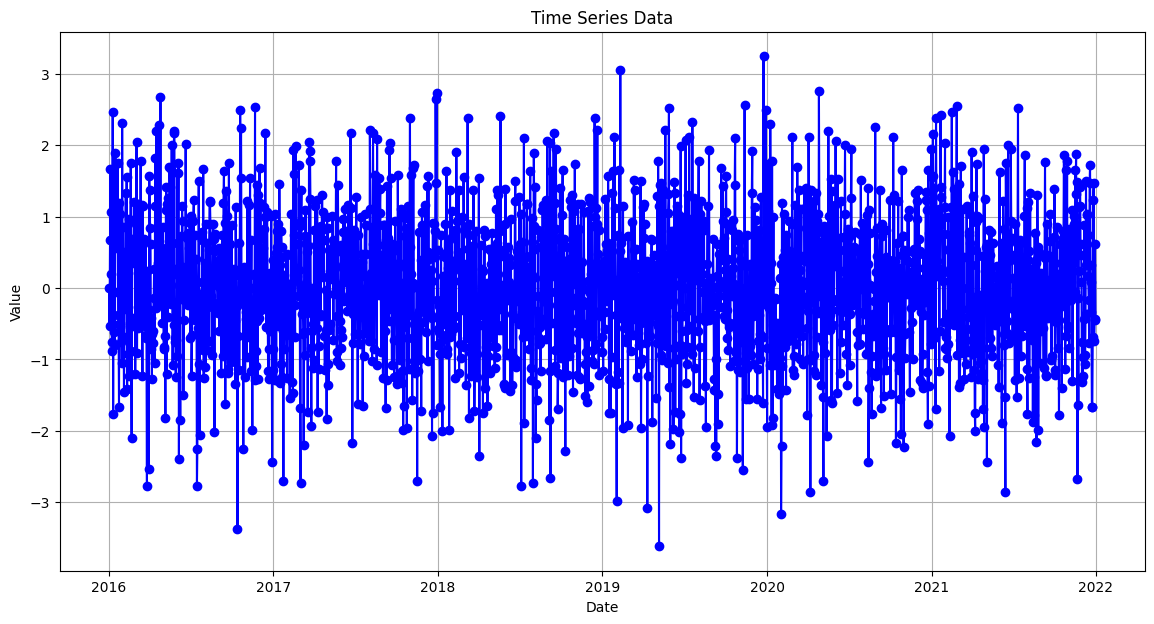

In [15]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with random data over a range from 2017-01-01 to 2022-12-31
data = {
    'DATE': pd.date_range(start='2017-01-01', end='2022-12-31', freq='D'),
    'VALUE': np.random.randn(len(pd.date_range(start='2017-01-01', end='2022-12-31', freq='D')))
}
df = pd.DataFrame(data)

# Ensure DATE is in datetime format and set as index
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

# Conduct the Augmented Dickey-Fuller test
result = sm.tsa.adfuller(df['VALUE'])

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

# Plotting the time series data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['VALUE'], marker='o', linestyle='-', color='b')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


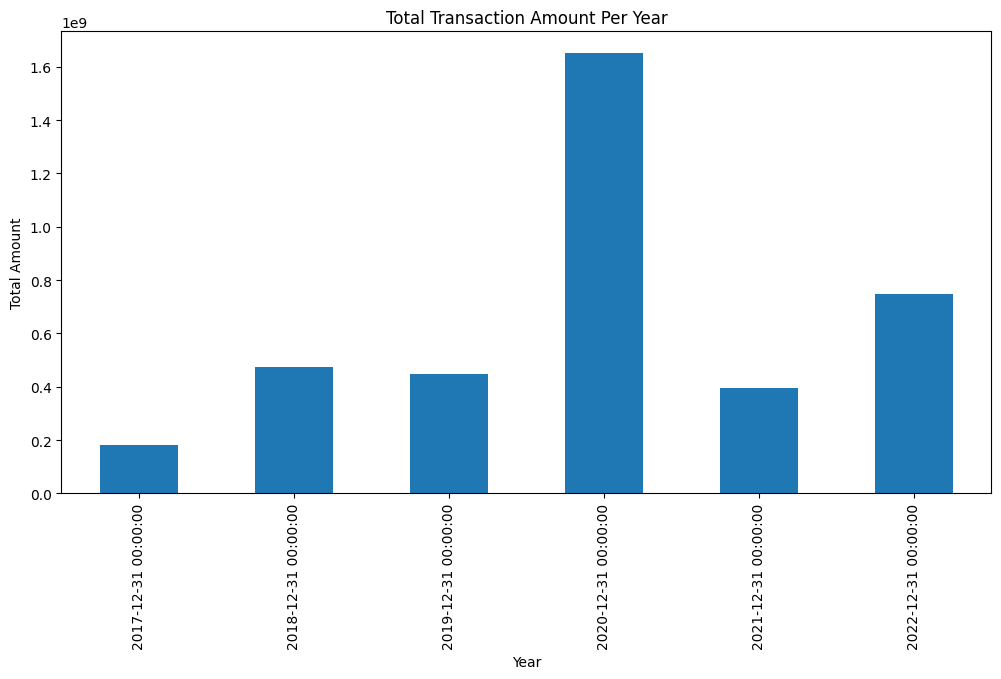

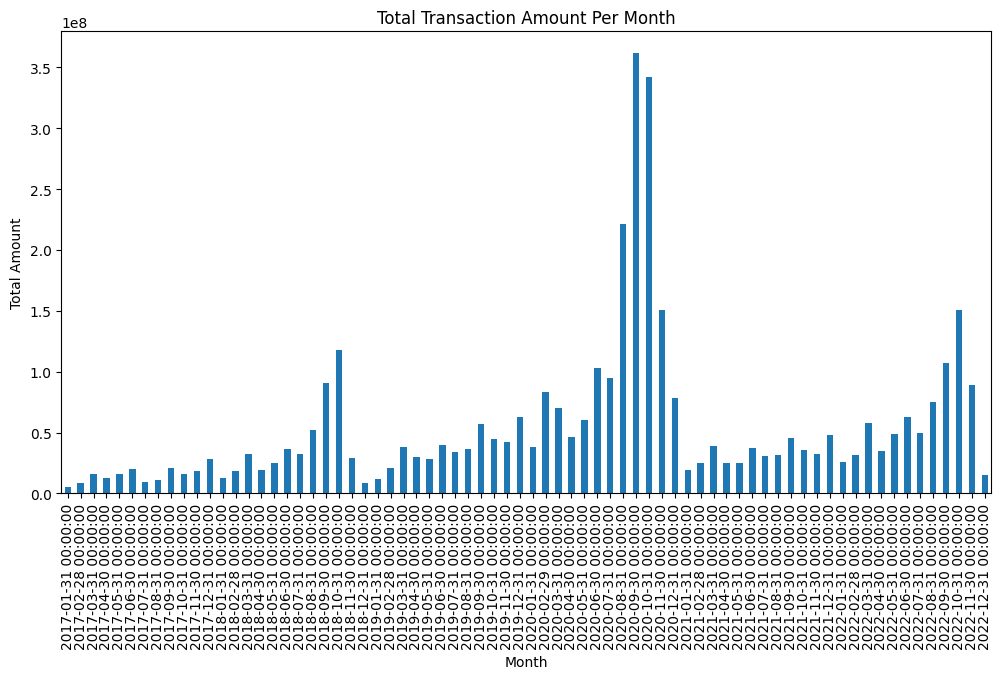

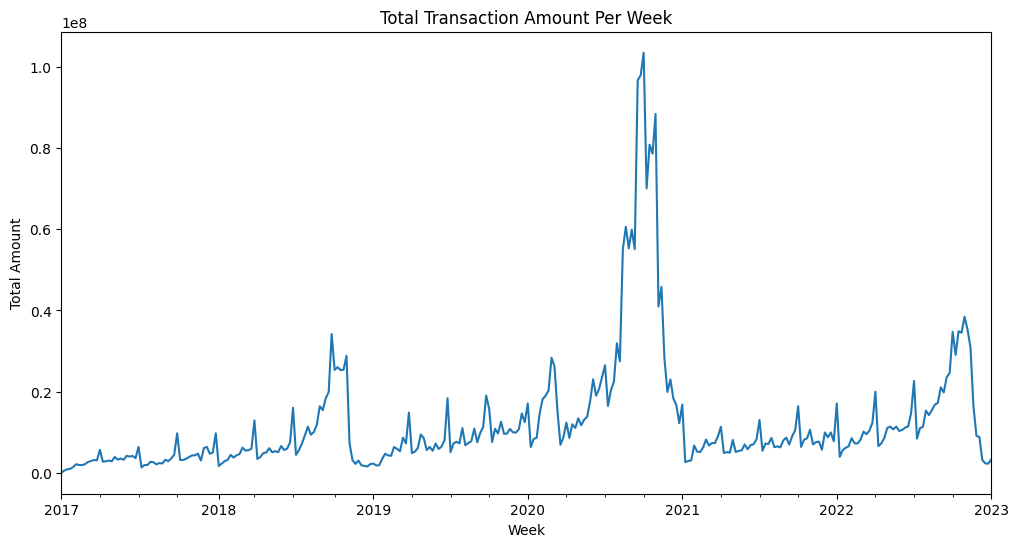

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a 'TRANSACTION_AMT' column.

# Convert 'TRANSACTION_AMT' to a numeric type, coercing any errors to NaN
df['TRANSACTION_AMT'] = pd.to_numeric(df['TRANSACTION_AMT'], errors='coerce')

# Drop any rows that now contain NaN in 'TRANSACTION_AMT' column if needed
# df.dropna(subset=['TRANSACTION_AMT'], inplace=True)

# Now that 'TRANSACTION_AMT' is numeric, resample and sum
total_per_year = df['TRANSACTION_AMT'].resample('Y').sum()
total_per_month = df['TRANSACTION_AMT'].resample('M').sum()
total_per_week = df['TRANSACTION_AMT'].resample('W').sum()

# Plotting the results
# For the year
plt.figure(figsize=(12, 6))
total_per_year.plot(kind='bar')
plt.title('Total Transaction Amount Per Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()

# For the month
plt.figure(figsize=(12, 6))
total_per_month.plot(kind='bar')
plt.title('Total Transaction Amount Per Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

# For the week
plt.figure(figsize=(12, 6))
total_per_week.plot()
plt.title('Total Transaction Amount Per Week')
plt.xlabel('Week')
plt.ylabel('Total Amount')
plt.show()


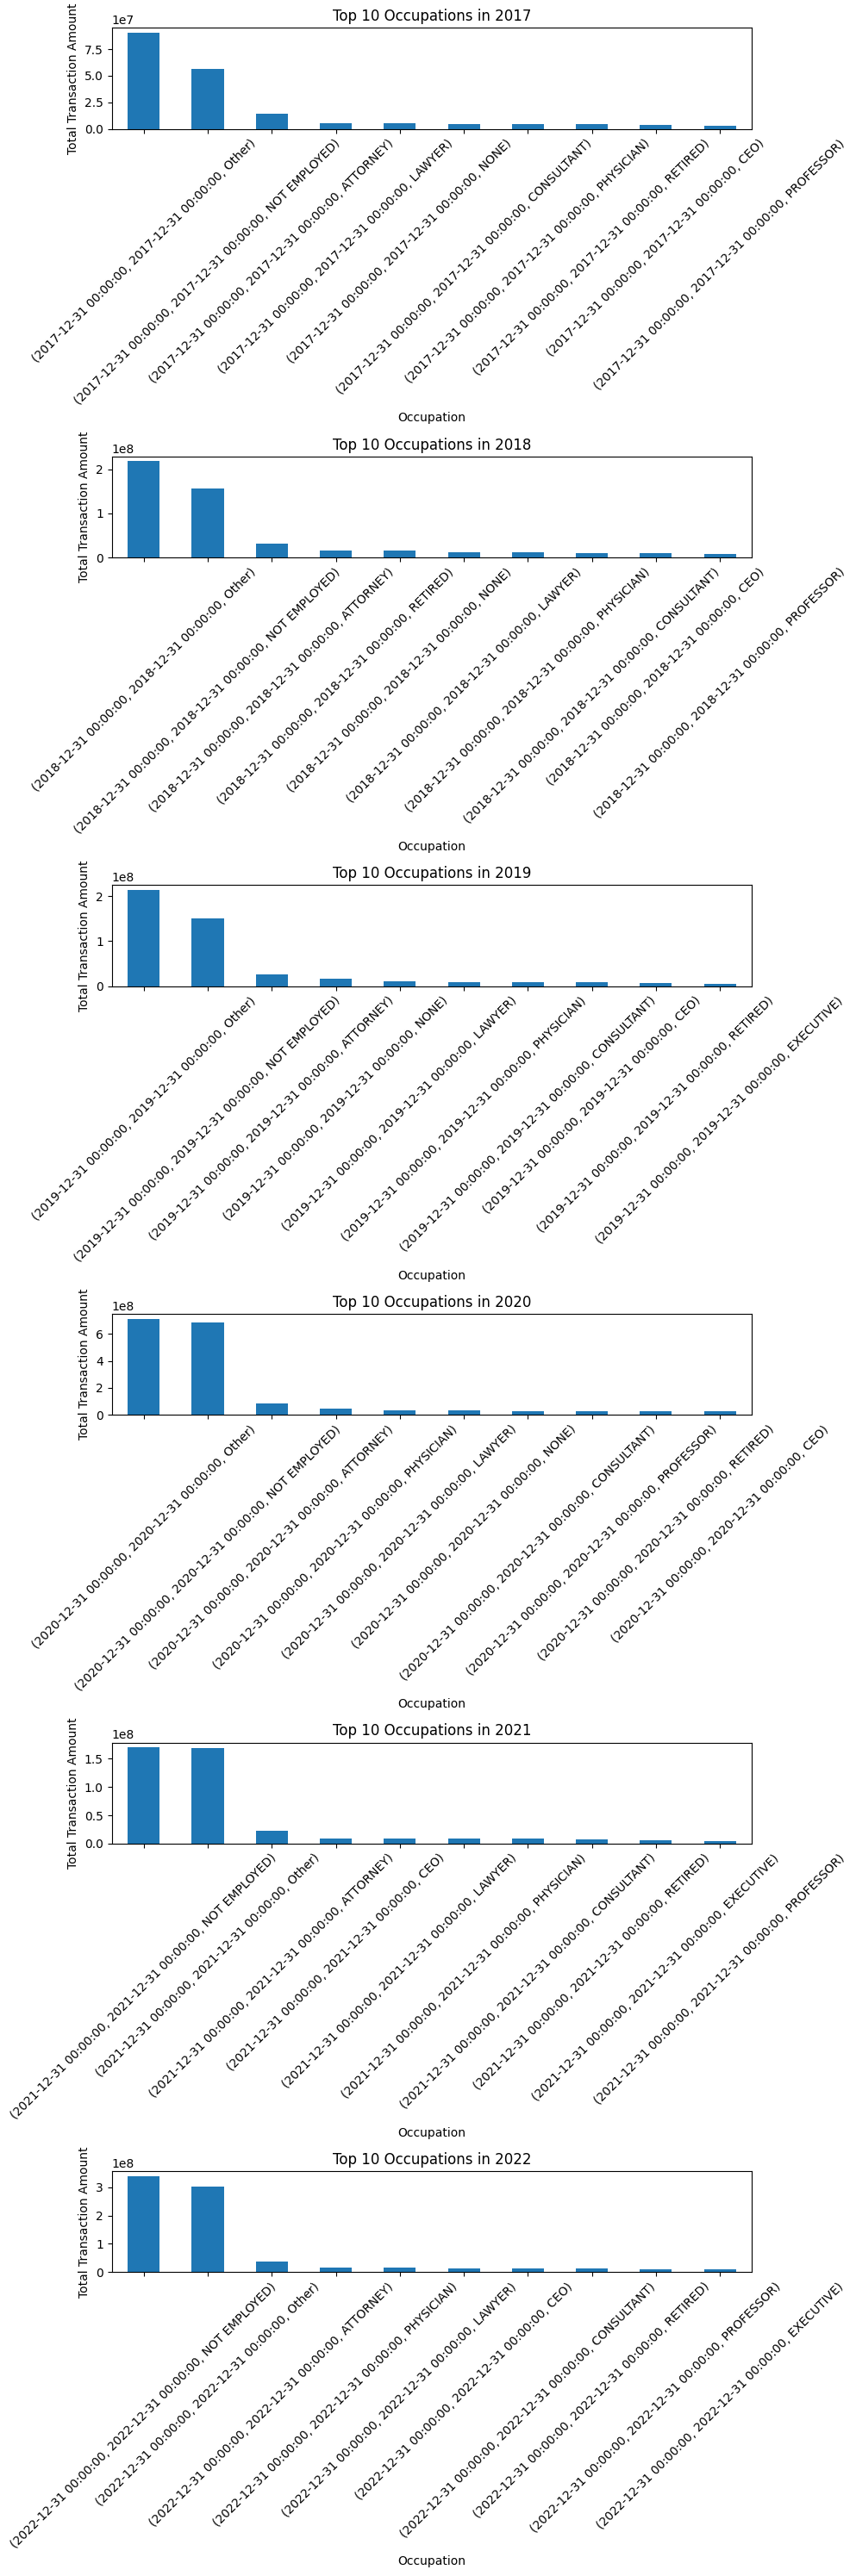

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'TRANSACTION_AMT' and 'OCCUPATION' columns.
# Also assuming 'DATE' is a column in 'df' and not the index.

# Drop rows where 'OCCUPATION' is NaN
df.dropna(subset=['OCCUPATION'], inplace=True)

# Convert 'TRANSACTION_AMT' to numeric, coercing errors to NaN and then dropping those rows
df['TRANSACTION_AMT'] = pd.to_numeric(df['TRANSACTION_AMT'], errors='coerce')
df.dropna(subset=['TRANSACTION_AMT'], inplace=True)

# Group by year and occupation, then sum the transaction amounts
yearly_occupation_sum = df.groupby([pd.Grouper(freq='Y'), 'OCCUPATION'])['TRANSACTION_AMT'].sum()

# Identify the top ten occupations for each year
def top_occupations_yearly(group):
    return group.nlargest(10)

top_occupations_per_year = yearly_occupation_sum.groupby(level=0).apply(top_occupations_yearly)

# Plotting
# Each subplot will show the top 10 occupations for a given year
num_years = len(top_occupations_per_year.index.get_level_values(0).unique())
fig, axes = plt.subplots(num_years, 1, figsize=(10, 5 * num_years))

for (year, data), ax in zip(top_occupations_per_year.groupby(level=0), axes):
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Top 10 Occupations in {year.year}')
    ax.set_xlabel('Occupation')
    ax.set_ylabel('Total Transaction Amount')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Note: This code assumes that your DataFrame 'df' is correctly structured and the necessary columns are present.
# The plots will be stacked vertically, one for each year in the dataset.
# Adjust the figure size and layout as needed based on your dataset and display preferences.


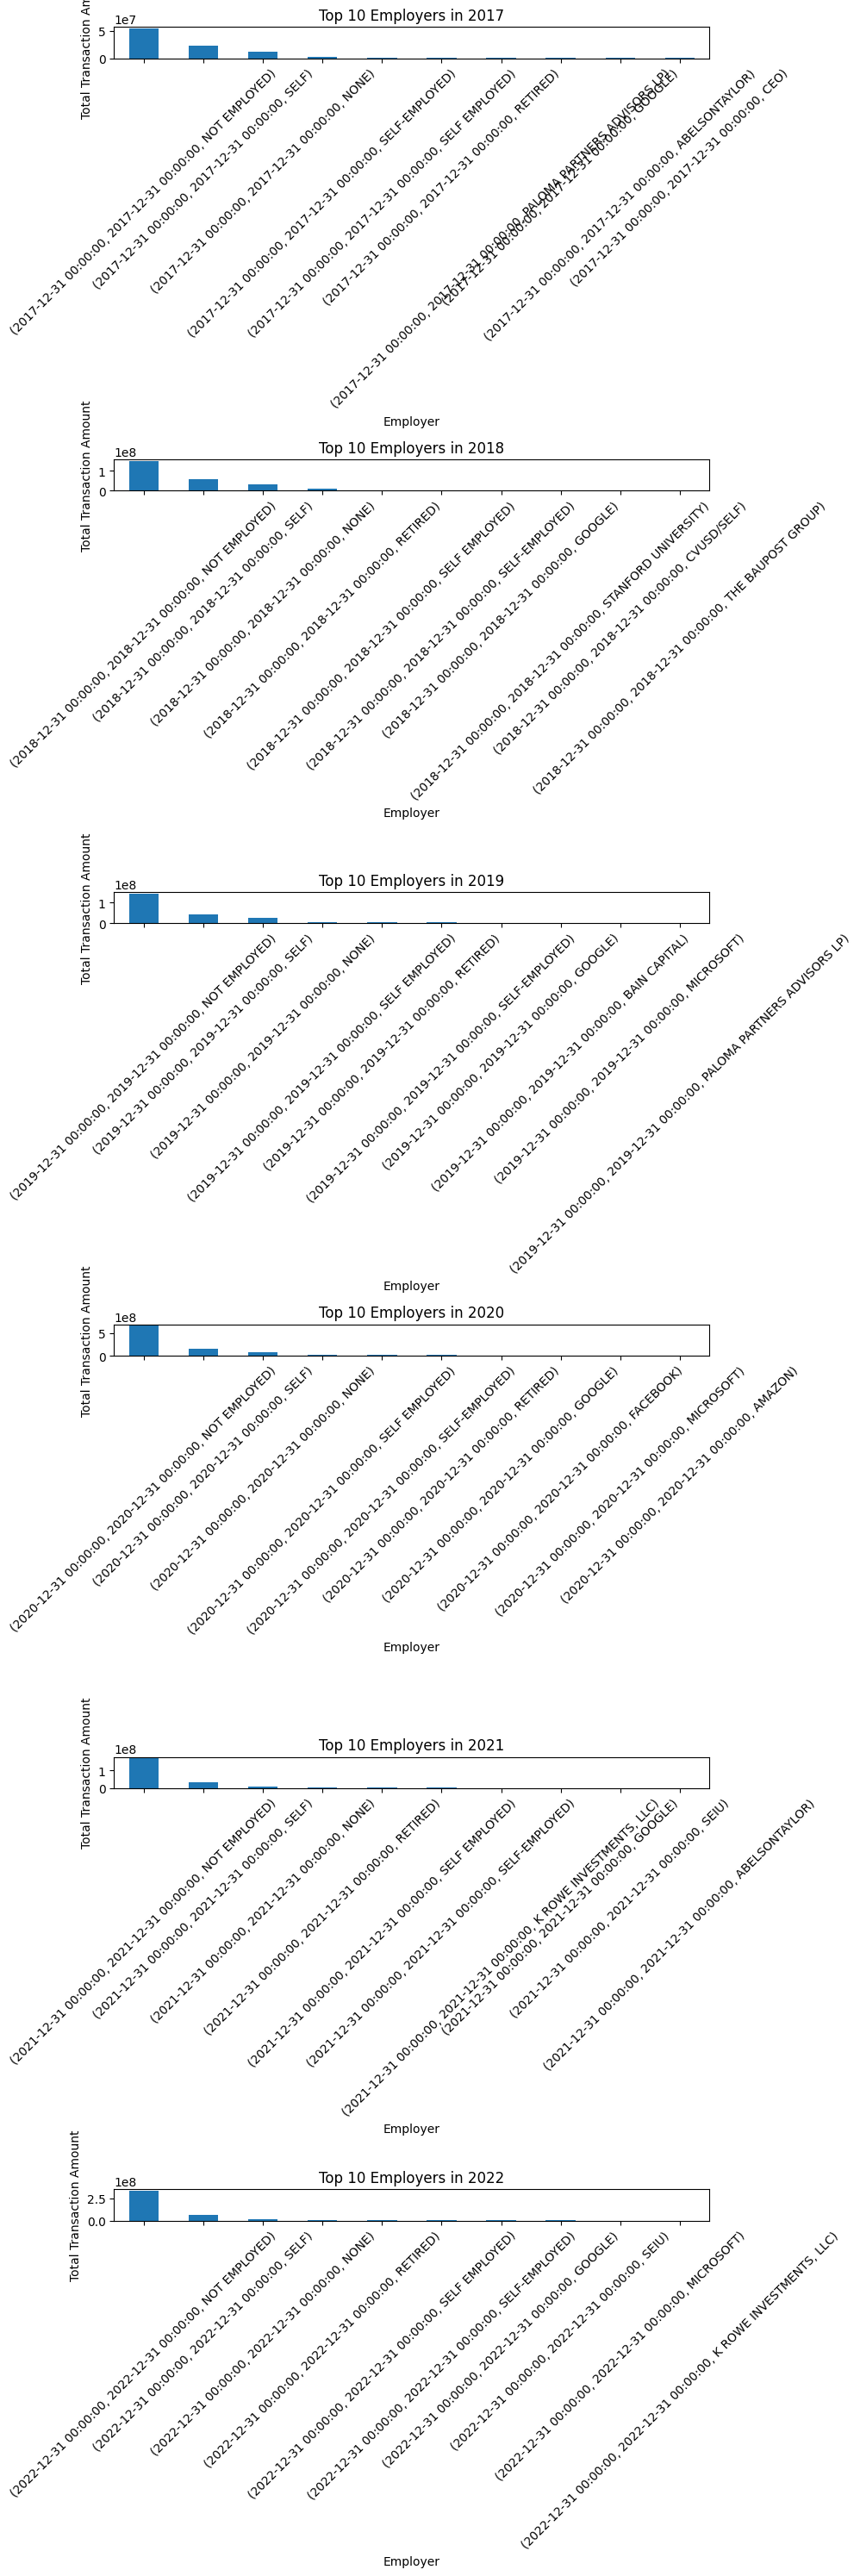

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'TRANSACTION_AMT' and 'EMPLOYER' columns.
# Also assuming 'DATE' is a column in 'df' and not the index.

# Drop rows where 'EMPLOYER' is NaN
df.dropna(subset=['EMPLOYER'], inplace=True)

# Convert 'TRANSACTION_AMT' to numeric, coercing errors to NaN and then dropping those rows
df['TRANSACTION_AMT'] = pd.to_numeric(df['TRANSACTION_AMT'], errors='coerce')
df.dropna(subset=['TRANSACTION_AMT'], inplace=True)

# Group by year and employer, then sum the transaction amounts
yearly_employer_sum = df.groupby([pd.Grouper(freq='Y'), 'EMPLOYER'])['TRANSACTION_AMT'].sum()

# Identify the top ten employers for each year
def top_employers_yearly(group):
    return group.nlargest(10)

top_employers_per_year = yearly_employer_sum.groupby(level=0).apply(top_employers_yearly)

# Plotting
# Each subplot will show the top 10 employers for a given year
num_years = len(top_employers_per_year.index.get_level_values(0).unique())
fig, axes = plt.subplots(num_years, 1, figsize=(10, 5 * num_years))

for (year, data), ax in zip(top_employers_per_year.groupby(level=0), axes):
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Top 10 Employers in {year.year}')
    ax.set_xlabel('Employer')
    ax.set_ylabel('Total Transaction Amount')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Note: This code assumes that your DataFrame 'df' is correctly structured and the necessary columns are present.
# The plots will be stacked vertically, one for each year in the dataset.
# Adjust the figure size and layout as needed based on your dataset and display preferences.


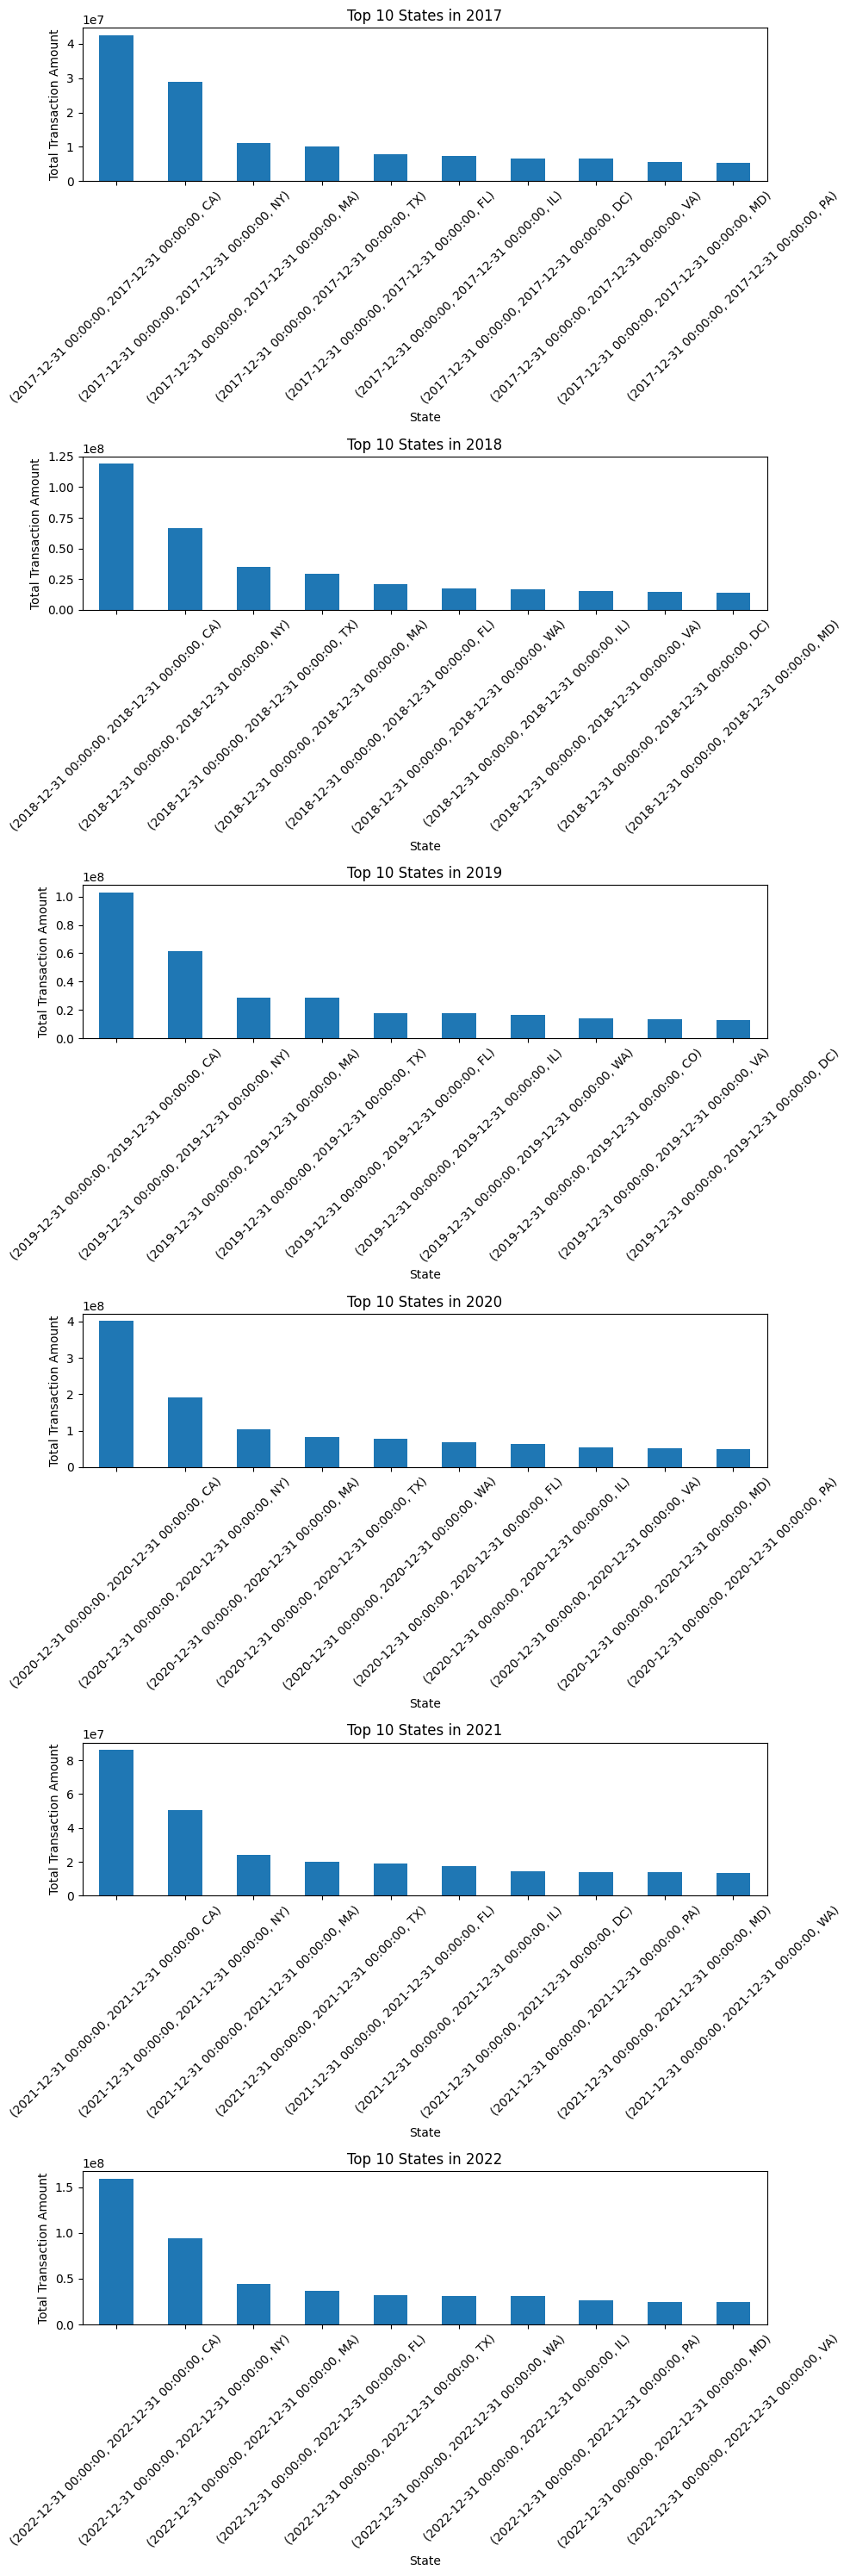

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'TRANSACTION_AMT' and 'STATE' columns.
# Also assuming 'DATE' is a column in 'df' and not the index.

# Drop rows where 'STATE' is NaN
df.dropna(subset=['STATE'], inplace=True)

# Convert 'TRANSACTION_AMT' to numeric, coercing errors to NaN and then dropping those rows
df['TRANSACTION_AMT'] = pd.to_numeric(df['TRANSACTION_AMT'], errors='coerce')
df.dropna(subset=['TRANSACTION_AMT'], inplace=True)

# Group by year and state, then sum the transaction amounts
yearly_state_sum = df.groupby([pd.Grouper(freq='Y'), 'STATE'])['TRANSACTION_AMT'].sum()

# Identify the top ten states for each year
def top_states_yearly(group):
    return group.nlargest(10)

top_states_per_year = yearly_state_sum.groupby(level=0).apply(top_states_yearly)

# Plotting
# Each subplot will show the top 10 states for a given year
num_years = len(top_states_per_year.index.get_level_values(0).unique())
fig, axes = plt.subplots(num_years, 1, figsize=(10, 5 * num_years))

for (year, data), ax in zip(top_states_per_year.groupby(level=0), axes):
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Top 10 States in {year.year}')
    ax.set_xlabel('State')
    ax.set_ylabel('Total Transaction Amount')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Note: This code assumes that your DataFrame 'df' is correctly structured and the necessary columns are present.
# The plots will be stacked vertically, one for each year in the dataset.
# Adjust the figure size and layout as needed based on your dataset and display preferences.


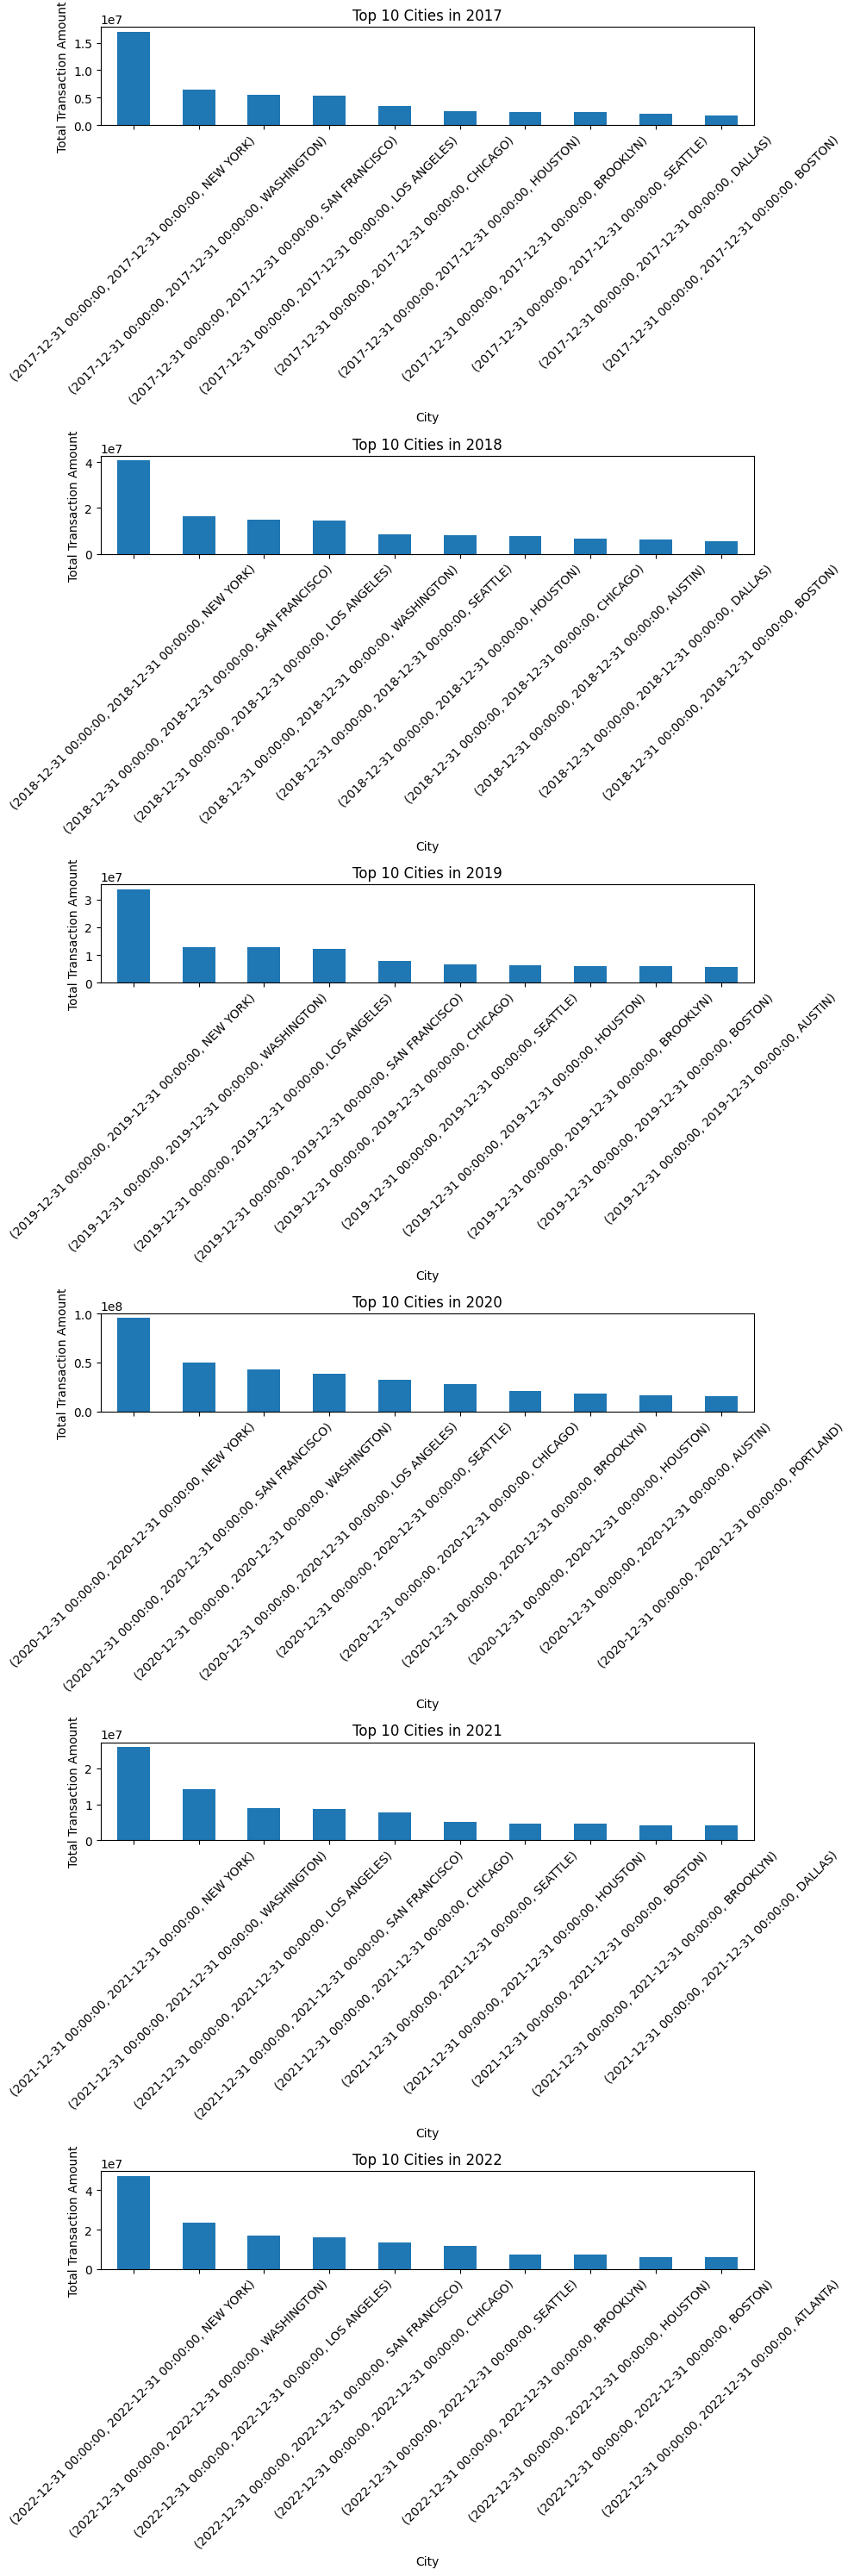

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'TRANSACTION_AMT' and 'CITY' columns.
# Also assuming 'DATE' is a column in 'df' and not the index.

# Drop rows where 'CITY' is NaN
df.dropna(subset=['CITY'], inplace=True)

# Convert 'TRANSACTION_AMT' to numeric, coercing errors to NaN and then dropping those rows
df['TRANSACTION_AMT'] = pd.to_numeric(df['TRANSACTION_AMT'], errors='coerce')
df.dropna(subset=['TRANSACTION_AMT'], inplace=True)

# Group by year and city, then sum the transaction amounts
yearly_city_sum = df.groupby([pd.Grouper(freq='Y'), 'CITY'])['TRANSACTION_AMT'].sum()

# Identify the top ten cities for each year
def top_cities_yearly(group):
    return group.nlargest(10)

top_cities_per_year = yearly_city_sum.groupby(level=0).apply(top_cities_yearly)

# Plotting
# Each subplot will show the top 10 cities for a given year
num_years = len(top_cities_per_year.index.get_level_values(0).unique())
fig, axes = plt.subplots(num_years, 1, figsize=(10, 5 * num_years))

for (year, data), ax in zip(top_cities_per_year.groupby(level=0), axes):
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Top 10 Cities in {year.year}')
    ax.set_xlabel('City')
    ax.set_ylabel('Total Transaction Amount')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Note: This code assumes that your DataFrame 'df' is correctly structured and the necessary columns are present.
# The plots will be stacked vertically, one for each year in the dataset.
# Adjust the figure size and layout as needed based on your dataset and display preferences.


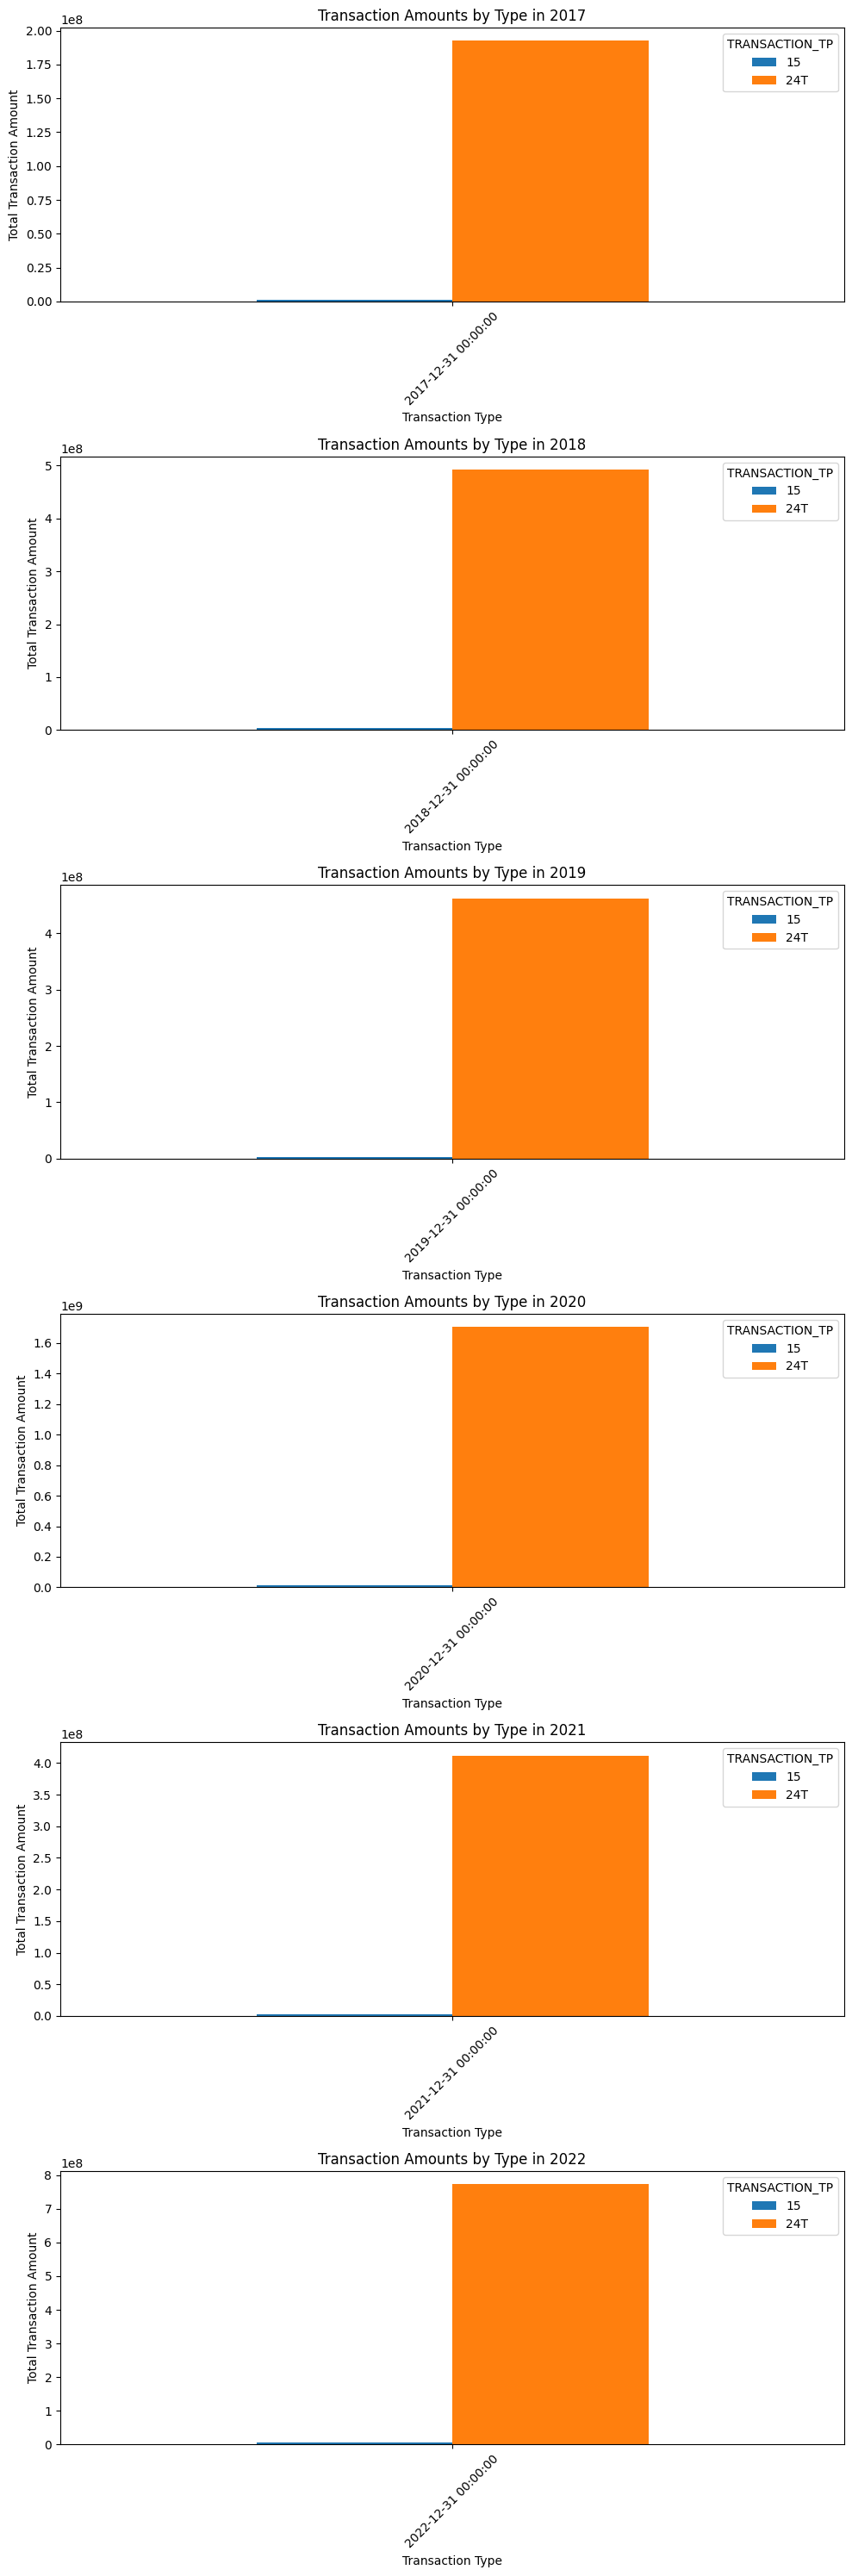

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'TRANSACTION_AMT' and 'TRANSACTION_TP' columns.
# Also assuming 'DATE' is a column in 'df' and not the index.

# Drop rows where 'TRANSACTION_TP' is NaN
df.dropna(subset=['TRANSACTION_TP'], inplace=True)

# Convert 'TRANSACTION_AMT' to numeric, coercing errors to NaN and then dropping those rows
df['TRANSACTION_AMT'] = pd.to_numeric(df['TRANSACTION_AMT'], errors='coerce')
df.dropna(subset=['TRANSACTION_AMT'], inplace=True)

# Group by year and transaction type, then sum the transaction amounts
yearly_transaction_type_sum = df.groupby([pd.Grouper(freq='Y'), 'TRANSACTION_TP'])['TRANSACTION_AMT'].sum()

# Plotting
# Each subplot will show the transaction amounts by type for a given year
num_years = len(yearly_transaction_type_sum.index.get_level_values(0).unique())
fig, axes = plt.subplots(num_years, 1, figsize=(10, 5 * num_years))

for (year, data), ax in zip(yearly_transaction_type_sum.groupby(level=0), axes):
    data.unstack().plot(kind='bar', ax=ax)
    ax.set_title(f'Transaction Amounts by Type in {year.year}')
    ax.set_xlabel('Transaction Type')
    ax.set_ylabel('Total Transaction Amount')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Note: This code assumes that your DataFrame 'df' is correctly structured and the necessary columns are present.
# The plots will be stacked vertically, one for each year in the dataset.
# Adjust the figure size and layout as needed based on your dataset and display preferences.


In [41]:
pip install seaborn


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 294 kB 239 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
